# Spline Regression
> Using statsmodels library 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import datetime as dt

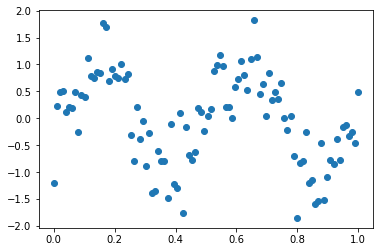

In [166]:
x = np.linspace(0,1,100)
y = np.sin(4*np.pi*x)
noise = 0.5 * np.random.normal(size=100)
y = y + noise
plt.scatter(x,y)

In [167]:
df = pd.DataFrame(columns= ['x', 'y'])
df.x = x
df.y = y
df

,x,y
0,0.000000,-1.208575
1,0.010101,0.234388
2,0.020202,0.483987
3,0.030303,0.506863
4,0.040404,0.118118
...,...,...
95,0.959596,-0.134463
96,0.969697,-0.331540
97,0.979798,-0.251748
98,0.989899,-0.462755


In [183]:
formula = ('y ~ bs(x, df=3, degree=1)')
model_spline = smf.ols(formula=formula, data=df)
result_spline = model_spline.fit()
print(result_spline.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     13.65
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           1.73e-07
Time:                        23:30:14   Log-Likelihood:                -105.81
No. Observations:                 100   AIC:                             219.6
Df Residuals:                      96   BIC:                             230.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

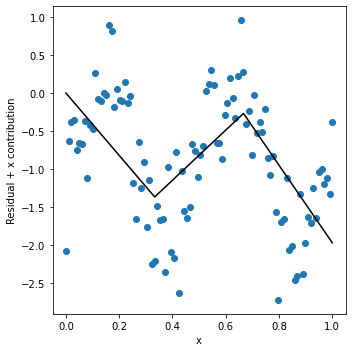

In [184]:
fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_spline, df, 'y', 'x', ax)

plt.tight_layout()
plt.show()

In [138]:
def partialResidualPlot(model, df, outcome, feature, ax):
    y_pred = model.predict(df)
    copy_df = df.copy()
    for c in copy_df.columns:
        if c == feature:
            continue
        copy_df[c] = 0.0
    feature_prediction = model.predict(copy_df)
    results = pd.DataFrame({
        'feature': df[feature],
        'residual': df[outcome] - y_pred,
        'ypartial': feature_prediction - model.params[0],
    })
    results = results.sort_values(by=['feature'])
    smoothed = sm.nonparametric.lowess(results.ypartial, results.feature, frac=1/3)
    
    ax.scatter(results.feature, results.ypartial + results.residual)
#     ax.plot(smoothed[:, 0], smoothed[:, 1], color='gray')
    ax.plot(results.feature, results.ypartial, color='black')
    ax.set_xlabel(feature)
    ax.set_ylabel(f'Residual + {feature} contribution')
    return ax